# Exploratory Data Analysis - Analisis Korelasi Tingkat Kekerasan dan Kemiskinan di Daerah Jawa Barat, Jawa Tengah, dan Kalimantan Selatan

Kekerasan dan kemiskinan seringkali dianggap sebagai dua hal yang berbanding lurus. "Kemiskinan adalah situasi yang mendorong wanita mengalami kekerasan dalam rumah tangga" (Ratna, 2023), hal ini menarik untuk ditelusuri lebih dalam karena menurut Value Champion, sebuah perushaanriset yang berbasis di singapura, Indonesia merupakan negara paling berbahaya kedua bagi perempuan di kawasan Asia Pasifik.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Membaca data

In [5]:
#membaca file csv dan menampilkan atribut dari tabel
df_KekerasanTempatKejadianJawaTengah = pd.read_csv('KekerasanTempatKejadian-JawaTengah.csv')
df_KekerasanTempatKejadianJawaBarat = pd.read_csv('KekerasanTempatKejadian-JawaBarat.csv')
df_KalselTempatKejadian = pd.read_csv('KalselTempatKejadian2019-2022.csv')
df_Jabarkeparahankemiskinan2019 = pd.read_csv('Jabarkeparahankemiskinan2019.csv')
df_Jabarkeparahankemiskinan2022 = pd.read_csv('Jabarkeparahankemiskinan2022.csv')
df_Kalselkeparahankemiskinan2019 = pd.read_csv('Kalselkeparahankemiskinan2019.csv')
df_Kalselkeparahankemiskinan2022 = pd.read_csv('Kalselkeparahankemiskinan2022.csv')
df_Jatengkeparahankemiskinan2019 = pd.read_csv('Jatengkeparahankemiskinan2019.csv')
df_Jatengkeparahankemiskinan2022 = pd.read_csv('Jatengkeparahankemiskinan2022.csv')
df_KekerasanTempatKejadianJawaTengah2022 = pd.read_csv('KekerasanTempatKejadian-JawaTengah2022.csv')

In [ ]:
df_KekerasanTempatKejadianJawaBarat.head()

In [ ]:
df_KalselTempatKejadian.head()

In [ ]:
df_Jabarkeparahankemiskinan2019.head()

In [ ]:
df_Jabarkeparahankemiskinan2022.head()

In [ ]:
df_Kalselkeparahankemiskinan2019.head()

In [ ]:
df_Kalselkeparahankemiskinan2022.head()

In [ ]:
df_Jatengkeparahankemiskinan2019.head()

In [ ]:
df_Jatengkeparahankemiskinan2022.head()

In [ ]:
df_KekerasanTempatKejadianJawaTengah2022.head()

### Analisis tabel banyak kasus kekerasan Jawa Tengah tahun 2019 dan 2022

In [7]:
# buat dictionary untuk memilih kolom yang ingin digunakan
selected_cols = ['Rumah Tangga', 'Tempat Kerja', 'Sekolah']

# pre-processing data dengan mengambil kolom dari dataframe berdasarkan dictionary
df_selected = df_KekerasanTempatKejadianJawaTengah[selected_cols]

# pre-processing untuk mengelompokkan kelompok pada selected_cols menjadi kategori lainnya
df_KekerasanTempatKejadianJawaTengah['Lainnya'] = df_KekerasanTempatKejadianJawaTengah[['Fasilitas Umum', 'Lembaga Pendidikan Kilat']].sum(axis=1)

# pre-processing memasukan kedalam dataframe sebelumnya yang berisi "rumah tangga", "tempat kerja", "sekolah"
df_selected['Lainnya'] = df_KekerasanTempatKejadianJawaTengah['Lainnya']

# hitung total kejadian
total_kejadian = df_selected.sum()

# tambahkan index pada dataframe
df_transposed = total_kejadian.reset_index()

# pre-processing data dengan mengambil kolom yang diperlukan saja 
df_transposed.columns = ['tempat_kejadian', 'jumlah']
df_transposed = df_transposed.rename(columns={'jumlah': '2019'})

# pindahkan dataframe
df_Jateng = df_transposed

# lakukan hal yang sama untuk tabel tahun 2022
df_KekerasanTempatKejadianJawaTengah2022
df_selected2022 = df_KekerasanTempatKejadianJawaTengah2022[df_KekerasanTempatKejadianJawaTengah2022['lokasi'].isin(selected_cols)]
df_selected2022 = df_selected2022.groupby('lokasi', as_index=False).sum()
df_lainnya2022 = df_KekerasanTempatKejadianJawaTengah2022[~df_KekerasanTempatKejadianJawaTengah2022['lokasi'].isin(selected_cols)]
df_lainnya2022 = df_lainnya2022['jml'].sum()

# ambil tabel yang diperlukan, lakukan penyesuaian nama kolom, dan merge dua tabel 2019 dan 2022
select = ['lokasi', 'jml']
df_selected2022 = df_selected2022[select]
df_lainnya2022 = pd.DataFrame({'lokasi': 'Lainnya', 'jml': df_lainnya2022}, index=[0])
df_Jateng2022 = pd.concat([df_selected2022, df_lainnya2022], ignore_index=True)
df_Jateng2022 = df_Jateng2022.rename(columns={'lokasi': 'tempat_kejadian', 'jml': '2022'})

# merge kedua tabel
df_Jateng = pd.merge(df_Jateng, df_Jateng2022, on='tempat_kejadian', how='outer')
df_Jateng

C:\Users\ntshd\AppData\Local\Temp\ipykernel_31336\1612906609.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Lainnya'] = df_KekerasanTempatKejadianJawaTengah['Lainnya']


,tempat_kejadian,2019,2022
0,Lainnya,202,153
1,Rumah Tangga,846,735
2,Sekolah,50,10
3,Tempat Kerja,18,11


### Analisis tabel kasus kekerasan Jawa Barat tahun 2019 dan 2022

In [8]:
# buat dictionary untuk memilih kolom yang ingin digunakan
selected_jabar = ['RUMAH TANGGA', 'TEMPAT KERJA', 'SEKOLAH']

# pre-processing data dengan menbuat perbaikan pada dataframe
df_KekerasanTempatKejadianJawaBarat = df_KekerasanTempatKejadianJawaBarat.replace({'TEMPAT KEJADIAN': 'TEMPAT KERJA'}) #ada kesalahan dalam dataframe, tempat kejadian seharusnya tempat kerja

# filter data utk tahun 2019 saja
df_TempatKejadianJawaBarat2019 = df_KekerasanTempatKejadianJawaBarat[df_KekerasanTempatKejadianJawaBarat['tahun'] == 2019]

# filter data  berdasarkan data yang sudah dipilih di dictionary sebelumnya dan kelompokkan data yang tdk sesuai ke kolom lainnya
df_selected = df_TempatKejadianJawaBarat2019[df_TempatKejadianJawaBarat2019['tempat_kejadian'].isin(selected_jabar)]
df_others = df_TempatKejadianJawaBarat2019[~df_TempatKejadianJawaBarat2019['tempat_kejadian'].isin(selected_jabar)]

# jumlahkan total seluruh kejadian kekerasan untuk kategori lainnya dan masukan ke dataframe
total_lainnya_jabar = df_others['jumlah_kekerasan'].sum()
df_lainnya = pd.DataFrame({'tempat_kejadian': ['LAINNYA'], 'jumlah_kekerasan': [total_lainnya_jabar], 'satuan': ['KASUS'], 'tahun': [2019]})

# gabungkan dataframe
df_FinalJabar = pd.concat([df_selected, df_lainnya], ignore_index=True)
df_FinalJabar = df_FinalJabar.groupby('tempat_kejadian', as_index=False).sum()

# ambil kolom yang dibutuhkan
selected_cols = ['tempat_kejadian', 'jumlah_kekerasan']
df_FinalJabar = df_FinalJabar[selected_cols]

# pre-processing data,ganti nama kolom dan baris utk mempermudah concat dengan tabel daerah lainnya nanti
df_FinalJabar.rename(columns={'jumlah_kekerasan': '2019'}, inplace=True)
df_FinalJabar.replace(['LAINNYA', 'RUMAH TANGGA', 'SEKOLAH', 'TEMPAT KERJA'],['Lainnya', 'Rumah Tangga', 'Sekolah', 'Tempat Kerja'], inplace=True)

# filter dta utk tahun 2022 saja
df_TempatKejadianJawaBarat2022 = df_KekerasanTempatKejadianJawaBarat[df_KekerasanTempatKejadianJawaBarat['tahun'] == 2022]

# filter data  berdasarkan data yang sudah dipilih di dictionary sebelumnya dan kelompokkan data yang tdk sesuai ke kolom lainnya
df_selected = df_TempatKejadianJawaBarat2022[df_TempatKejadianJawaBarat2022['tempat_kejadian'].isin(selected_jabar)]
df_others = df_TempatKejadianJawaBarat2022[~df_TempatKejadianJawaBarat2022['tempat_kejadian'].isin(selected_jabar)]

# jumlahkan total seluruh kejadian kekerasan untuk kategori lainnya dan masukan ke dataframe
total_lainnya_jabar = df_others['jumlah_kekerasan'].sum()
df_lainnya = pd.DataFrame({'tempat_kejadian': ['LAINNYA'], 'jumlah_kekerasan': [total_lainnya_jabar], 'satuan': ['KASUS'], 'tahun': [202]})
df_jabar2022 = pd.concat([df_selected, df_lainnya], ignore_index=True)
df_jabar2022 = df_jabar2022.groupby('tempat_kejadian', as_index=False).sum()

# ambil kolom yang dibutuhkan
col = ['tempat_kejadian', 'jumlah_kekerasan']
df_jabar2022 = df_jabar2022[col]
df_jabar2022 = df_jabar2022.rename(columns={'jumlah_kekerasan': '2022'})
df_jabar2022 = df_jabar2022.replace(['LAINNYA', 'RUMAH TANGGA', 'SEKOLAH', 'TEMPAT KERJA'],['Lainnya', 'Rumah Tangga', 'Sekolah', 'Tempat Kerja'])
df_jabar2022

# merge dua tabel yang sudah dianalisis
df_FinalJabar = pd.merge(df_FinalJabar, df_jabar2022,on='tempat_kejadian', how='outer')

df_FinalJabar

,tempat_kejadian,2019,2022
0,Lainnya,321,701
1,Rumah Tangga,444,1103
2,Sekolah,32,64
3,Tempat Kerja,8,51


### Analisis tabel kasus kekerasan Kalimantan Selatan 2019 dan 2022

In [ ]:
# buat dictionary untuk memilih kolom yang ingin digunakan
selected_kalsel = ['Tempat Kerja', 'Rumah tangga', 'Sekolah']

# ganti nama kolom supaya sesuai di dataframenya nanti
df_KalselTempatKejadian = df_KalselTempatKejadian.rename(columns={'Kabupaten/Kota': 'lokasi'})

# ambil data yang dibutuhkan
df_selected_kalsel = df_KalselTempatKejadian[df_KalselTempatKejadian['lokasi'].isin(selected_kalsel)]
df_others_kalsel = df_KalselTempatKejadian[~df_KalselTempatKejadian['lokasi'].isin(selected_kalsel)]

# hitung kategori tempat kejahatan selain selected_kalsel unutk dimasukan ke kategori lainnya
total_lainnya_kalsel2022 = df_others_kalsel['2022'].sum()
df_lainnya_kalsel2022 = pd.DataFrame({'lokasi': ['Lainnya'], '2022': [total_lainnya_kalsel2022]})

# hitung juga untuk tahun 2019
total_lainnya_kalsel2019 = df_others_kalsel['2019'].sum()
df_lainnya_kalsel2019 = pd.DataFrame({'lokasi': ['Lainnya'], '2019': [total_lainnya_kalsel2019]})

df_FinalKalsel = pd.concat([df_selected_kalsel, df_lainnya_kalsel2022, df_lainnya_kalsel2019], ignore_index=True)
df_FinalKalsel = df_FinalKalsel.groupby('lokasi', as_index=False).sum()

col = ['lokasi', '2019', '2022']
df_FinalKalsel = df_FinalKalsel[col]
df_FinalKalsel = df_FinalKalsel.rename(columns={'lokasi': 'tempat_kejadian'})
df_FinalKalsel

,tempat_kejadian,2019,2022
0,Lainnya,220.0,505.0
1,Rumah tangga,94.0,267.0
2,Sekolah,8.0,22.0
3,Tempat Kerja,0.0,12.0


## Visualisasi data

### Menampilkan grafik perbandingan antara ketiga daerah 

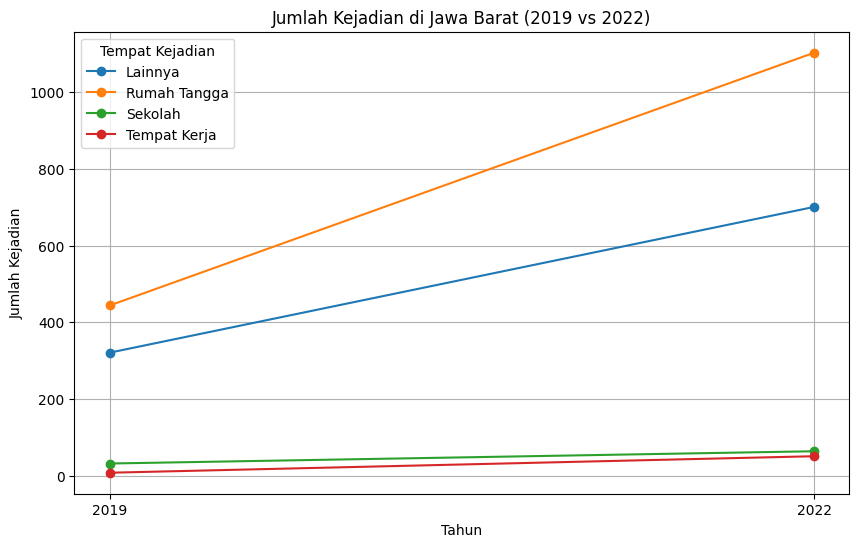

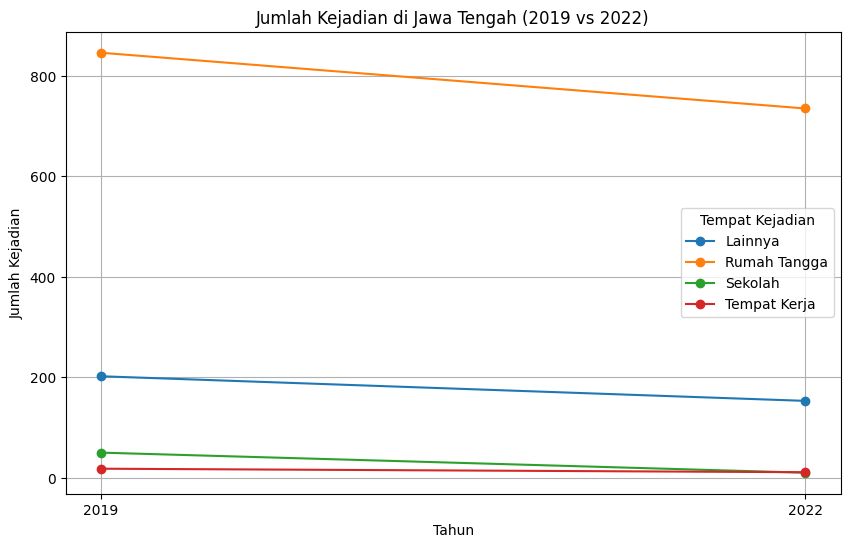

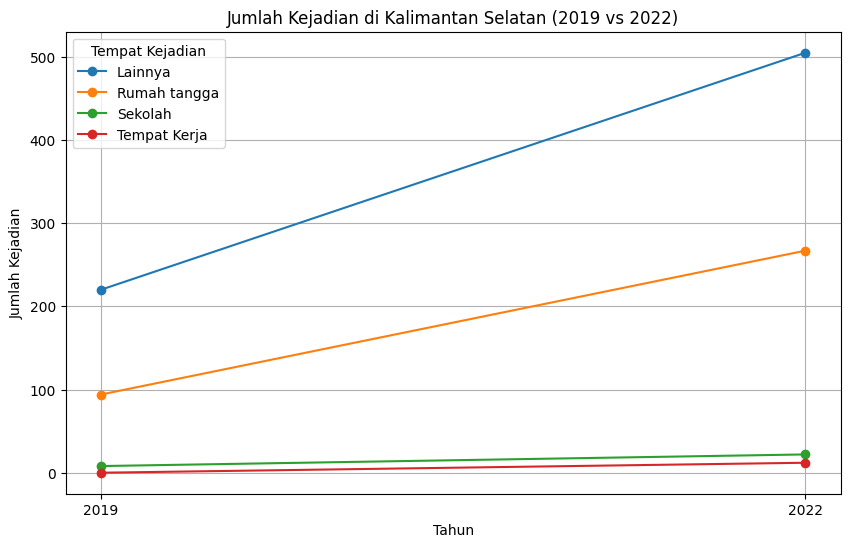

In [10]:
# fungsi untuk plot masing masing daerah
def plot_data_per_daerah(df, daerah):
    df_melted = df.melt(id_vars='tempat_kejadian', value_vars=['2019', '2022'], var_name='Tahun', value_name='Jumlah Kejadian')
    
    plt.figure(figsize=(10, 6))
    
    # looping untuk mengambil value data yang perlu ditampilkan di plot
    for tempat in df['tempat_kejadian']:
        df_tempat = df_melted[df_melted['tempat_kejadian'] == tempat]
        
        # buat plot
        plt.plot(df_tempat['Tahun'], df_tempat['Jumlah Kejadian'], marker='o', label=tempat)
    
    # atur isi plot
    plt.title(f'Jumlah Kejadian di {daerah} (2019 vs 2022)')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kejadian')
    plt.legend(title='Tempat Kejadian')
    plt.grid(True)
    plt.show()

# panggil fungsi utk menampilkan plot masing-masing daerah
plot_data_per_daerah(df_FinalJabar, 'Jawa Barat')
plot_data_per_daerah(df_Jateng, 'Jawa Tengah')
plot_data_per_daerah(df_FinalKalsel, 'Kalimantan Selatan')

In [11]:
# jumlah total kekerasan terjadi per tahun 2019
total_jateng2019 = df_Jateng['2019'].sum()
total_jabar2019 = df_FinalJabar['2019'].sum()
total_kalsel2019 = df_FinalKalsel['2019'].sum()

# menghitung total kekerawsan terjadi per tahun 2022
total_jateng2022 = df_Jateng['2022'].sum()
total_jabar2022 = df_FinalJabar['2022'].sum()
total_kalsel2022 = df_FinalKalsel['2022'].sum()

# menghitung persentase berdasarkan jumlah penduduk pada tahun itu
jateng_percentage2019 = (total_jateng2019 / 17212455) * 100
jabar_percentage2019 = (total_jabar2019 / 49316712) * 100
kalsel_percentage2019 = (total_kalsel2019 / 4055406) * 100
jateng_percentage2022 = (total_jateng2022 / 37032410) * 100
jabar_percentage2022 = (total_jabar2022 / 49405808) * 100
kalsel_percentage2022 = (total_kalsel2022 / 4178229) * 100

# bulatkan 
jateng_percentage2019 = round(jateng_percentage2019, 4)
jabar_percentage2019 = round(jabar_percentage2019, 4)
kalsel_percentage2019 = round(kalsel_percentage2019, 4)
jateng_percentage2022 = round(jateng_percentage2022, 4)
jabar_percentage2022 = round(jabar_percentage2022, 4)
kalsel_percentage2022 = round(kalsel_percentage2022, 4)

# input ke data frame
data_persentase_jml_kekerasan = {
    'wilayah': ['Jawa Tengah', 'Jawa Barat', 'Kalimantan Selatan'],
    '2019': [jateng_percentage2019, jabar_percentage2019, kalsel_percentage2019],
    '2022': [jateng_percentage2022, jabar_percentage2022, kalsel_percentage2022]
}

# buat dataframe
df_persentase = pd.DataFrame(data_persentase_jml_kekerasan)
df_persentase

,wilayah,2019,2022
0,Jawa Tengah,0.0065,0.0025
1,Jawa Barat,0.0016,0.0039
2,Kalimantan Selatan,0.0079,0.0193


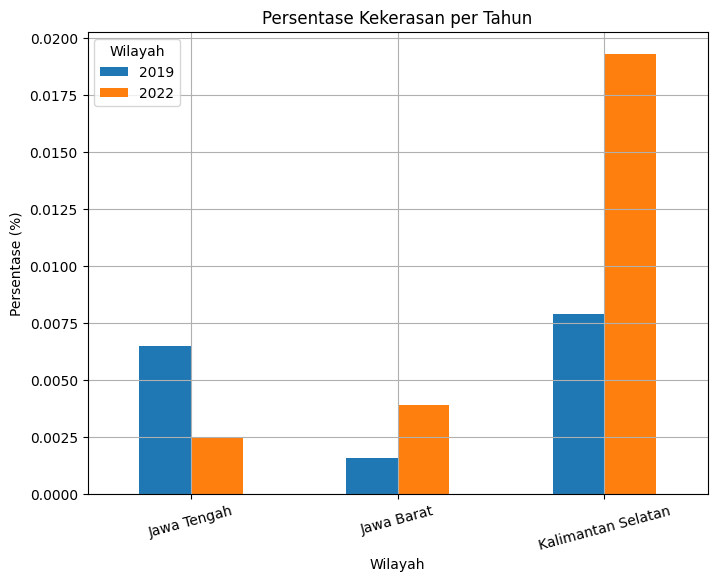

In [12]:
#tampilkan plot dari hasil persentase
df_persentase.set_index('wilayah').plot(kind='bar', figsize=(8, 6))

# atur isi plot
plt.title('Persentase Kekerasan per Tahun')
plt.xlabel('Wilayah')
plt.xticks(rotation=15)
plt.ylabel('Persentase (%)')
plt.legend(title='Wilayah')
plt.grid(True)
plt.show()

In [13]:
# ambil value yang dibutuhkan untuk dataframe
df_indexkalsel2019 = df_Kalselkeparahankemiskinan2019['2019'].mean().round(2)
df_indexkalsel2022 = df_Kalselkeparahankemiskinan2022.loc[365,'2022']
df_indexjabar2019 = df_Jabarkeparahankemiskinan2019['2019'].mean().round(2)
df_indexjabar2022 = df_Jabarkeparahankemiskinan2022.loc[0,'2022']
df_indexjateng2019 = df_Jatengkeparahankemiskinan2019.loc[0,'2019']
df_indexjateng2022 = df_Jatengkeparahankemiskinan2022.loc[0,'2022']

# susun dataframe 
df_newdf = pd.DataFrame({ 'wilayah': ['Kalimantan Selatan', 'Jawa Barat', 'Jawa Tengah'],
            '2019': [df_indexkalsel2019, df_indexjabar2019, df_indexjateng2019] ,
            '2022': [df_indexkalsel2022, df_indexjabar2022, df_indexjateng2022]})

# ubah tipe data utk tahun 2022 
df_newdf['2022'] = pd.to_numeric(df_newdf['2022'], errors='coerce')
df_newdf


,wilayah,2019,2022
0,Kalimantan Selatan,0.16,0.12
1,Jawa Barat,0.21,0.33
2,Jawa Tengah,0.30,0.42


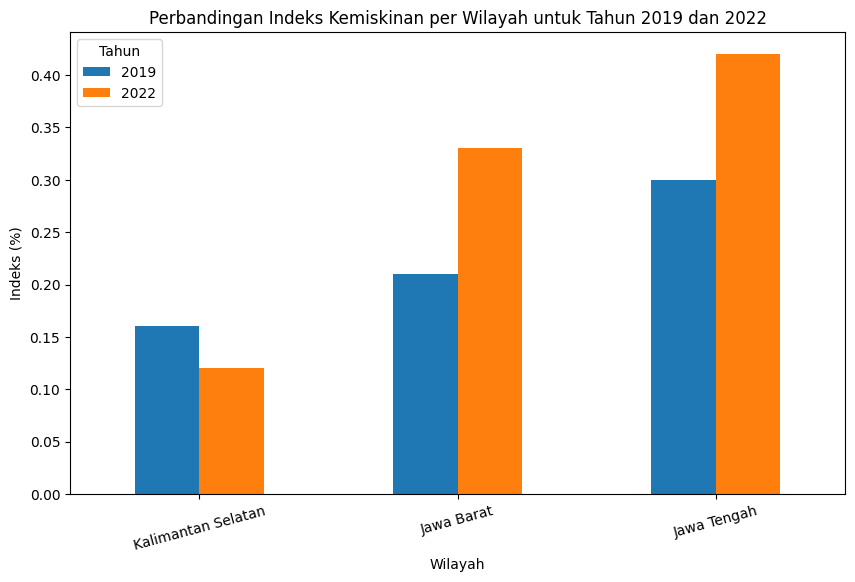

In [14]:
# tampilkan plot masing masing wilayah
df_newdf.set_index('wilayah').plot(kind='bar', figsize=(10, 6))

# atur isi plot
plt.title('Perbandingan Indeks Kemiskinan per Wilayah untuk Tahun 2019 dan 2022')
plt.xlabel('Wilayah')
plt.ylabel('Indeks (%)')
plt.xticks(rotation=15) 
plt.legend(title='Tahun')
plt.show()

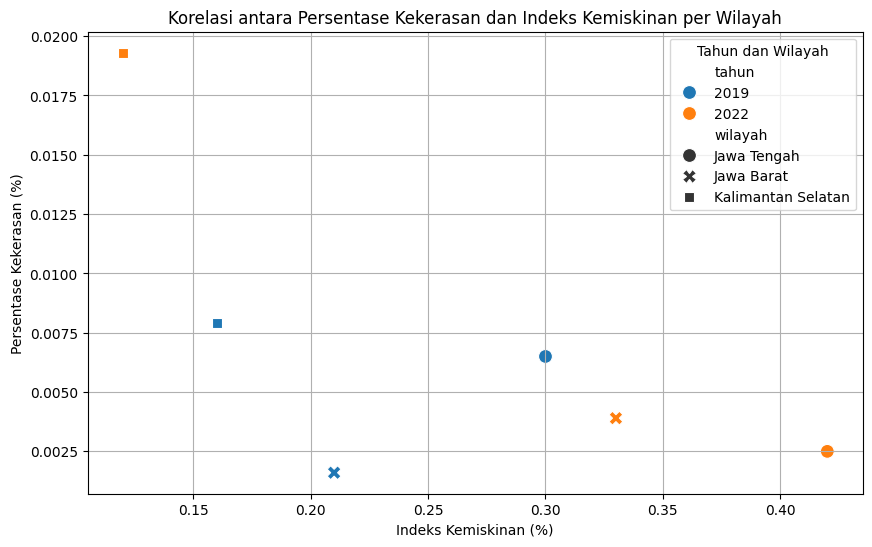

In [15]:
# import seaborn untuk menampilkan scatterplot
import seaborn as sns

df_kekerasan = df_persentase.melt(id_vars='wilayah', var_name='tahun', value_name='persentase_kekerasan')
df_kemiskinan = df_newdf.melt(id_vars='wilayah', var_name='tahun', value_name='indeks_kemiskinan')

# menggabungkan dataframe persentase kekerasan dan kemiskinan
df_merged = pd.merge(df_kekerasan, df_kemiskinan, on=['wilayah', 'tahun'])

plt.figure(figsize=(10, 6))

# membuat scatter plot
sns.scatterplot(data=df_merged, x='indeks_kemiskinan', y='persentase_kekerasan', hue='tahun', style='wilayah', s=100)

# atur isi plot
plt.title('Korelasi antara Persentase Kekerasan dan Indeks Kemiskinan per Wilayah')
plt.xlabel('Indeks Kemiskinan (%)')
plt.ylabel('Persentase Kekerasan (%)')
plt.grid(True)

plt.legend(title='Tahun dan Wilayah')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65c79be-89a6-461e-b128-0bc03e0caaaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>